In [43]:
import os
import requests
import pandas as pd
import numpy as np 
import panel as pn
pn.extension('plotly')
import plotly.express as px
import matplotlib.pyplot as plt
from plotnine import ggplot, aes, geom_bar

import seaborn as sns
import json

%matplotlib inline

In [44]:
my_cwn = 100 
my_dmp = 100
my_hvn = 100
my_pmv = 100

In [45]:
# import yfinance data
import yfinance as yf

In [46]:
data_df = yf.download(tickers = ['CWN.AX', 'DMP.AX', 'HVN.AX', 'PMV.AX'],period = "7d", interval = "1h")

[*********************100%***********************]  4 of 4 completed


In [47]:
data_df = data_df[["Close","Volume"]]
data_df


Close                                Volume  \
                           CWN.AX     DMP.AX HVN.AX     PMV.AX   CWN.AX   
2022-03-31 10:00:00+11:00  12.780  88.190002  5.420  28.230000        0   
2022-03-31 11:00:00+11:00  12.770  89.305000  5.410  28.280001   140007   
2022-03-31 12:00:00+11:00  12.770  89.309998  5.395  28.080000  1592936   
2022-03-31 13:00:00+11:00  12.765  88.959999  5.390  27.950001   516683   
2022-03-31 14:00:00+11:00  12.760  88.845001  5.370  27.959999   522008   
2022-03-31 15:00:00+11:00  12.750  88.129997  5.360  27.590000  3374079   
2022-03-31 16:00:00+11:00  12.760  87.849998  5.350  27.500000   828651   
2022-04-01 10:00:00+11:00  12.760  85.559998  5.280  26.740000        0   
2022-04-01 11:00:00+11:00  12.765  85.300003  5.290  26.639999   143473   
2022-04-01 12:00:00+11:00  12.770  84.559998  5.260  26.480000  1266560   
2022-04-01 13:00:00+11:00  12.775  84.730003  5.230  26.459999   627307   
2022-04-01 14:00:00+11:00  12.790  84.910004  5.210  26.830000   250825   
2022-04-01 15:00:00+11:00  12.785  84.559998  5.210  26.900000   845679   
2022-04-04 10:00:00+10:00  12.780  83.980003  5.220  27.070000        0   
2022-04-04 11:00:00+10:00  12.770  83.900002  5.220  27.299999   892053   
2022-04-04 12:00:00+10:00  12.780  83.589996  5.240  27.180000   442460   
2022-04-04 13:00:00+10:00  12.790  83.550003  5.260  27.240000   166077   
2022-04-04 14:00:00+10:00  12.780  83.550003  5.230  27.270000   588314   
2022-04-04 15:00:00+10:00  12.800  83.209999  5.170  27.120001   246877   
2022-04-04 16:00:00+10:00  12.790  82.809998  5.200  27.170000   272732   
2022-04-05 10:00:00+10:00  12.850  83.260002  5.200  27.240000        0   
2022-04-05 11:00:00+10:00  12.830  81.925003  5.215  27.570000   900708   
2022-04-05 12:00:00+10:00  12.830  82.019997  5.220  27.680000   159720   
2022-04-05 13:00:00+10:00  12.830  82.889999  5.210  27.639999    61808   
2022-04-05 14:00:00+10:00  12.840  82.500000  5.170  27.129999   604147   
2022-04-05 15:00:00+10:00  12.840  82.470001  5.160  27.100000   357830   
2022-04-05 16:00:00+10:00  12.850  82.629997  5.170  27.150000   113798   
2022-04-06 10:00:00+10:00  12.805  84.080002  5.130  26.730000        0   
2022-04-06 11:00:00+10:00  12.800  83.250000  5.140  26.870001   644263   
2022-04-06 12:00:00+10:00  12.790  83.809998  5.145  26.850000  5809508   
2022-04-06 13:00:00+10:00  12.775  83.309998  5.140  26.719999   649859   
2022-04-06 14:00:00+10:00  12.800  83.470001  5.140  26.809999   409050   
2022-04-06 15:00:00+10:00  12.765  83.330002  5.120  26.809999   688057   
2022-04-06 16:00:00+10:00  12.750  83.300003  5.130  26.860001  1061811   
2022-04-07 10:00:00+10:00  12.770  82.870003  5.080  26.410000        0   
2022-04-07 11:00:00+10:00  12.770  81.860001  5.080  26.370001  1831945   
2022-04-07 12:00:00+10:00  12.770  81.769997  5.045  26.230000   258641   
2022-04-07 13:00:00+10:00  12.770  81.279999  5.040  26.250000    49100   
2022-04-07 14:00:00+10:00  12.770  81.129997  5.025  26.190001   157956   
2022-04-07 15:00:00+10:00  12.760  81.190002  5.030  26.180000   742040   
2022-04-07 16:00:00+10:00  12.740  81.330002  5.040  26.129999   650529   
2022-04-08 10:00:00+10:00  12.790  80.040001  5.020  26.000000        0   
2022-04-08 11:00:00+10:00  12.780  81.089996  5.050  26.170000    49270   
2022-04-08 12:00:00+10:00  12.775  81.239998  5.060  26.040001    26470   
2022-04-08 13:00:00+10:00  12.780  80.930000  5.060  26.020000   119839   
2022-04-08 14:00:00+10:00  12.780  80.019997  5.055  26.030001    24689   
2022-04-08 15:00:00+10:00  12.780  80.669998  5.050  26.020000   141169   

                                                    
                           DMP.AX   HVN.AX  PMV.AX  
2022-03-31 10:00:00+11:00       0        0       0  
2022-03-31 11:00:00+11:00   46135   552766   21192  
2022-03-31 12:00:00+11:00   35381   433444   16893  
2022-03-31 13:00:00+11:00   35990   312889   23073  
2022-03-31 14:00:00+11:00   47528 

In [48]:

dataclose_df = data_df["Close"].copy()
dataclose_df


,CWN.AX,DMP.AX,HVN.AX,PMV.AX
2022-03-31 10:00:00+11:00,12.780,88.190002,5.420,28.230000
2022-03-31 11:00:00+11:00,12.770,89.305000,5.410,28.280001
2022-03-31 12:00:00+11:00,12.770,89.309998,5.395,28.080000
2022-03-31 13:00:00+11:00,12.765,88.959999,5.390,27.950001
2022-03-31 14:00:00+11:00,12.760,88.845001,5.370,27.959999
2022-03-31 15:00:00+11:00,12.750,88.129997,5.360,27.590000
2022-03-31 16:00:00+11:00,12.760,87.849998,5.350,27.500000
2022-04-01 10:00:00+11:00,12.760,85.559998,5.280,26.740000
2022-04-01 11:00:00+11:00,12.765,85.300003,5.290,26.639999
2022-04-01 12:00:00+11:00,12.770,84.559998,5.260,26.480000


In [49]:
datavol_df = data_df["Volume"].copy()
datavol_df

,CWN.AX,DMP.AX,HVN.AX,PMV.AX
2022-03-31 10:00:00+11:00,0,0,0,0
2022-03-31 11:00:00+11:00,140007,46135,552766,21192
2022-03-31 12:00:00+11:00,1592936,35381,433444,16893
2022-03-31 13:00:00+11:00,516683,35990,312889,23073
2022-03-31 14:00:00+11:00,522008,47528,343194,17412
2022-03-31 15:00:00+11:00,3374079,57910,503323,91605
2022-03-31 16:00:00+11:00,828651,124173,1598346,119879
2022-04-01 10:00:00+11:00,0,0,0,0
2022-04-01 11:00:00+11:00,143473,34066,373952,43742
2022-04-01 12:00:00+11:00,1266560,23950,390644,20023


In [50]:
def read_data(data, start, end):
    data_df = yf.download(data, start, end)
    period = "7d"
    interval = "1h"
    data_df.dropna(inplace = True)
    dataclose_df = data_df["Close"]
    return dataclose_df


In [60]:
#get standard deviation of Volumes 
datavol_std = datavol_df.std()
datavol_std.head()

CWN.AX    985486.263638
DMP.AX     58145.185283
HVN.AX    361993.777923
PMV.AX     22889.507604
dtype: float64

In [52]:
#aussharedata = read_data(['CWN.AX', 'DMP.AX', 'HVN.AX', 'PMV.AX'], "2022-03-25","2022-04-01")

In [53]:
# Helper create_bar_chart function
def create_bar_chart(data, title, xlabel, ylabel, color):
    """
    Create a barplot based in the data argument.
    """
    fig = plt.figure()
    bar_chart = data.plot.bar(color=color)
    bar_chart.set_xlabel(xlabel)
    bar_chart.set_ylabel(ylabel)
    bar_chart.set_title(title)
    plt.show()
    plt.close(fig)

In [54]:
def create_line_chart(data, title, xlabel, ylabel, color):
    """
    Create a line chart based in the data argument.
    """
    fig = plt.figure()
    line_chart = data.plot(color=color)
    line_chart.set_xlabel(xlabel)
    line_chart.set_ylabel(ylabel)
    line_chart.set_title(title)
    plt.show()
    plt.close(fig)

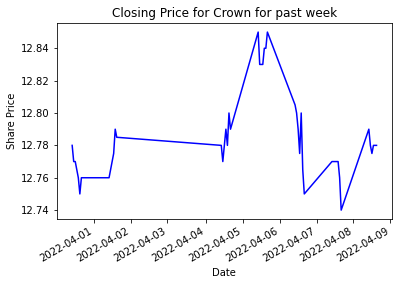

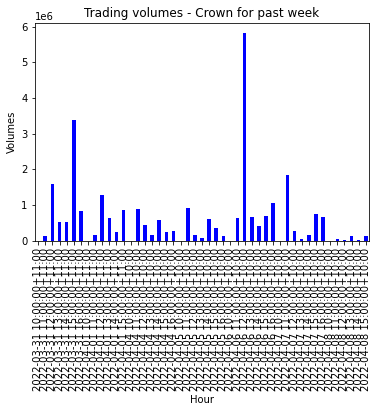

In [55]:
# Line  chart for closing prices 
create_line_chart(dataclose_df["CWN.AX"],"Closing Price for Crown for past week","Date","Share Price","blue")
# bar chart for volumes 
create_bar_chart(datavol_df["CWN.AX"],"Trading volumes - Crown for past week","Hour","Volumes","blue")




TypeError: float() argument must be a string or a number, not 'function'

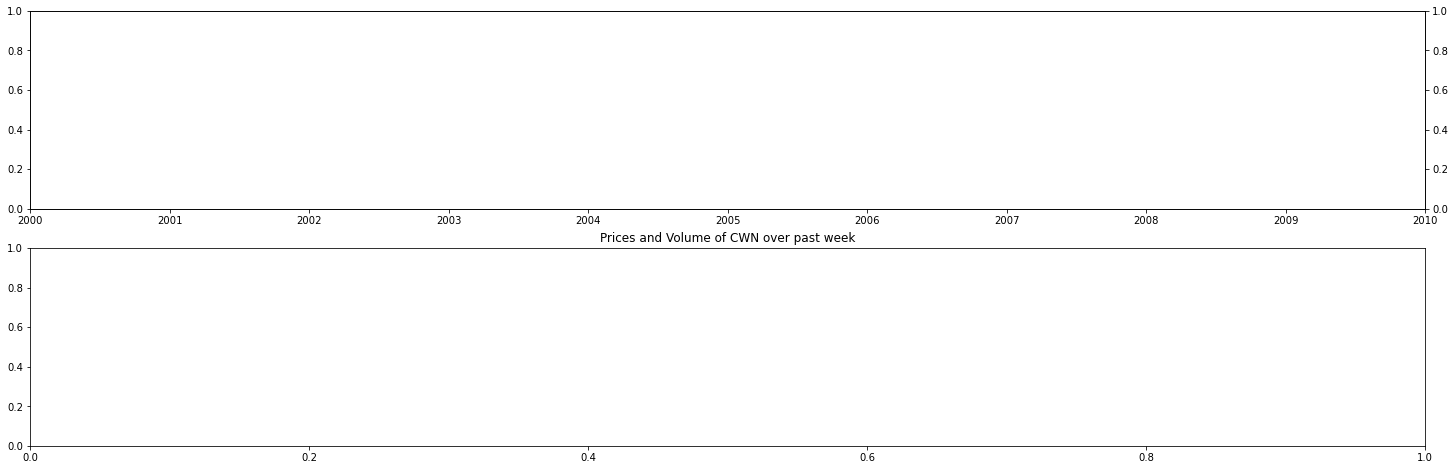

In [57]:

tidx = pd.date_range(start = '2022-04-04', end='2022-04-08', periods=5)
data_df = pd.DataFrame(pd.date_range, columns=['Close','Volume'], index=tidx)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(25,8))
plt.title('Prices and Volume of CWN over past week')
 
ax1b = ax1.twinx()    
plot1a, = ax1.plot(data_df.index, data_df.Close)
plot1b, = ax1b.plot(data-df.index, data_df.Volume, color='r')

ax2.set_xlabel('Date')
ax1.set_ylabel('Volume')
ax1b.set_ylabel('Closing Price')

plt.legend([plot1a, plot1b], data_df.columns)

# defining display layout
plt.tight_layout()

# show plot
plt.show()

In [30]:
ggplot() + 
  geom_bar(mapping = aes(x = data_df["Date"], y = data_df["Volume"], stat = "identity", fill = "grey") +
  geom_line(mapping = aes(x = data_df["Date"],  y = data_df["Price"], size = 2, color = "blue") + 
  scale_x_date(name = "Day", labels = NULL) +
  # (more)

SyntaxError: invalid syntax (Temp/ipykernel_12080/1217674864.py, line 1)

In [31]:
scale_y_continuous(name = "Volume", 
    sec.axis = sec_axis(~./7, name = "Closing Price", 
      labels = function(b)))   +
  # (more)

SyntaxError: invalid syntax (Temp/ipykernel_12080/501786730.py, line 2)

In [32]:
theme(
    axis.title.y = element_text(color = "grey"),
    axis.title.y.right = element_text(color = "blue"))

SyntaxError: keyword can't be an expression (Temp/ipykernel_12080/3201639943.py, line 2)

In [33]:
#ylim.prim <- c(1000, 6000000)   # in this example, Volume 
#ylim.sec <- c(6, 20)    # in this example, closing price

In [34]:
b <- diff(ylim.prim)/diff(ylim.sec)
a <- ylim.prim[1] - b*ylim.sec[1]) # will this work


ggplot(pricedata, aes(Days, volume)) +
  geom_col() +
  geom_line(aes(y = a + close_price*b), color = "red") +
  scale_y_continuous("Volume", sec.axis = sec_axis(~ (. - a)/b, name = "Closing Price")) +
  scale_x_continuous("Days", breaks = 1:7) +
  ggtitle("Price and Volume Data for CWN (Last 7 days)")  

SyntaxError: invalid syntax (Temp/ipykernel_12080/54295291.py, line 2)

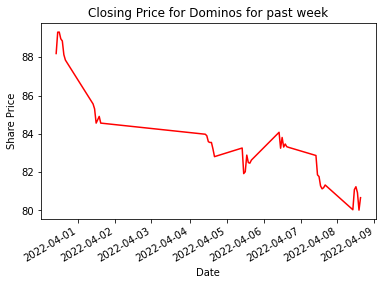

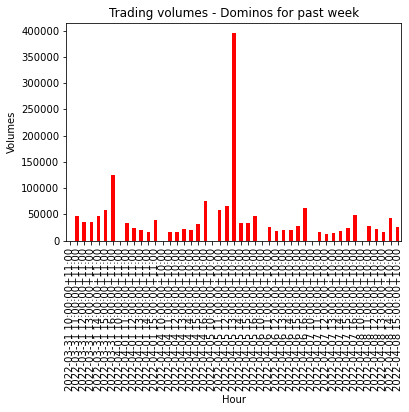

In [40]:
# Line chart for closing prices 
create_line_chart(dataclose_df["DMP.AX"],"Closing Price for Dominos for past week","Date","Share Price","red")
create_bar_chart(datavol_df["DMP.AX"],"Trading volumes - Dominos for past week","Hour","Volumes","red")

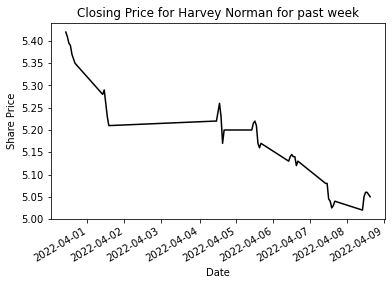

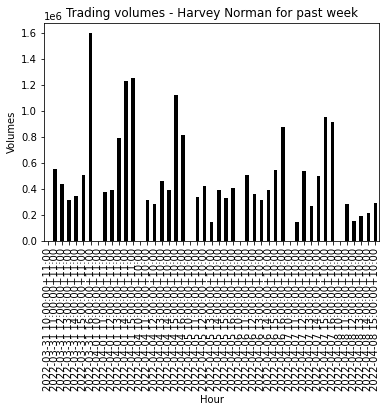

In [41]:
create_line_chart(dataclose_df["HVN.AX"],"Closing Price for Harvey Norman for past week","Date","Share Price","black")
create_bar_chart(datavol_df["HVN.AX"],"Trading volumes - Harvey Norman for past week","Hour","Volumes","black")

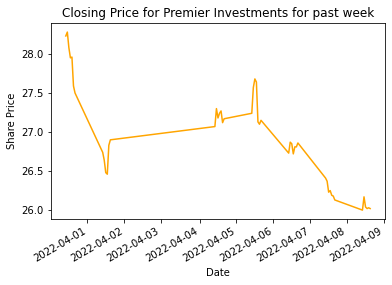

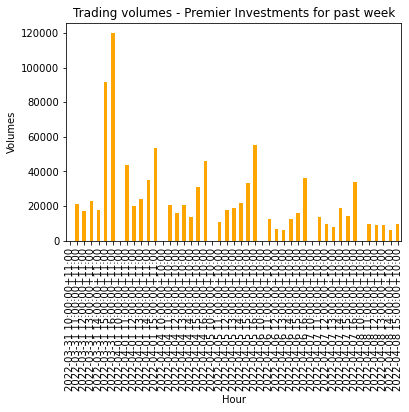

In [42]:
create_line_chart(dataclose_df["PMV.AX"],"Closing Price for Premier Investments for past week","Date","Share Price","orange")
create_bar_chart(datavol_df["PMV.AX"],"Trading volumes - Premier Investments for past week","Hour","Volumes","orange")

In [ ]:
# Define Data

x = np.arange(200)
y = np.cos(x)

# Plot Graph

fig, ax1 = plt.subplots()
ax1.plot(x, y)

# Define Labels

ax1.set_xlabel('X-axis')
ax1.set_ylabel('Y1-axis')

# Twin Axes

ax2 = ax1.twinx()
ax2.set_ylabel('Y2-axis')

# Set limit 

plt.ylim(-1, 1)

# Display

plt.show()

In [43]:
#aussharedata = yf.download('CWN.AX DMP.AX HVN.AX PMV.AX', start="2022-03-25", end="2022-04-01")
dataclose_df = dataclose_df.dropna()
dataclose_df.head(6)


,CWN.AX,DMP.AX,HVN.AX,PMV.AX
2022-03-31 10:00:00+11:00,12.780,88.190002,5.420,28.230000
2022-03-31 11:00:00+11:00,12.770,89.305000,5.410,28.280001
2022-03-31 12:00:00+11:00,12.770,89.309998,5.395,28.080000
2022-03-31 13:00:00+11:00,12.765,88.959999,5.390,27.950001
2022-03-31 14:00:00+11:00,12.760,88.845001,5.370,27.959999
2022-03-31 15:00:00+11:00,12.750,88.129997,5.360,27.590000


In [17]:
dataclosestd_df = dataclose_df.std()
dataclosestd_df.head()

CWN.AX    0.026568
DMP.AX    2.492757
HVN.AX    0.113603
PMV.AX    0.635450
dtype: float64

In [18]:
dataclosestd_df = dataclosestd_df.sort_values(ascending=False)
dataclosestd_df.head()

DMP.AX    2.492757
PMV.AX    0.635450
HVN.AX    0.113603
CWN.AX    0.026568
dtype: float64

In [19]:
correlation = dataclose_df.corr()
correlation

,CWN.AX,DMP.AX,HVN.AX,PMV.AX
CWN.AX,1.000000,-0.267692,-0.053604,0.210898
DMP.AX,-0.267692,1.000000,0.922309,0.772349
HVN.AX,-0.053604,0.922309,1.000000,0.875069
PMV.AX,0.210898,0.772349,0.875069,1.000000


<AxesSubplot:>

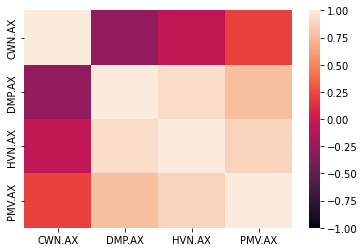

In [20]:
sns.heatmap(correlation, vmin=-1, vmax=1)

In [21]:
datareturns_df = dataclose_df.pct_change().copy()
datareturns_df.head(12)


,CWN.AX,DMP.AX,HVN.AX,PMV.AX
2022-03-31 10:00:00+11:00,NaN,NaN,NaN,NaN
2022-03-31 11:00:00+11:00,-0.000782,0.012643,-0.001845,0.001771
2022-03-31 12:00:00+11:00,0.000000,0.000056,-0.002773,-0.007072
2022-03-31 13:00:00+11:00,-0.000392,-0.003919,-0.000927,-0.004630
2022-03-31 14:00:00+11:00,-0.000392,-0.001293,-0.003711,0.000358
2022-03-31 15:00:00+11:00,-0.000784,-0.008048,-0.001862,-0.013233
2022-03-31 16:00:00+11:00,0.000784,-0.003177,-0.001866,-0.003262
2022-04-01 10:00:00+11:00,0.000000,-0.026067,-0.013084,-0.027636
2022-04-01 11:00:00+11:00,0.000392,-0.003039,0.001894,-0.003740
2022-04-01 12:00:00+11:00,0.000392,-0.008675,-0.005671,-0.006006


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

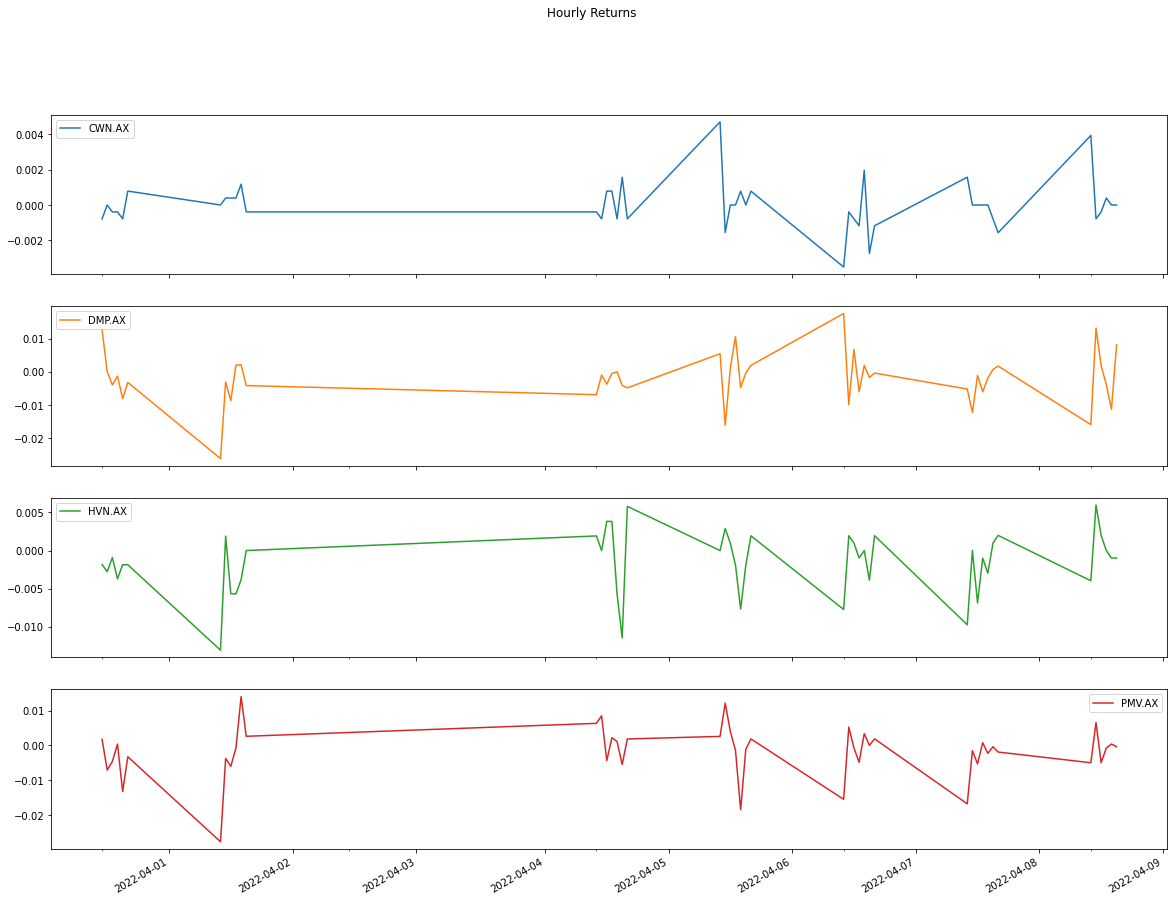

In [22]:
datareturns_df.plot(subplots=True,figsize=(20, 15), title="Hourly Returns")
#graph individually,for loop graphing each column

<AxesSubplot:title={'center':'Cumulative Returns'}>

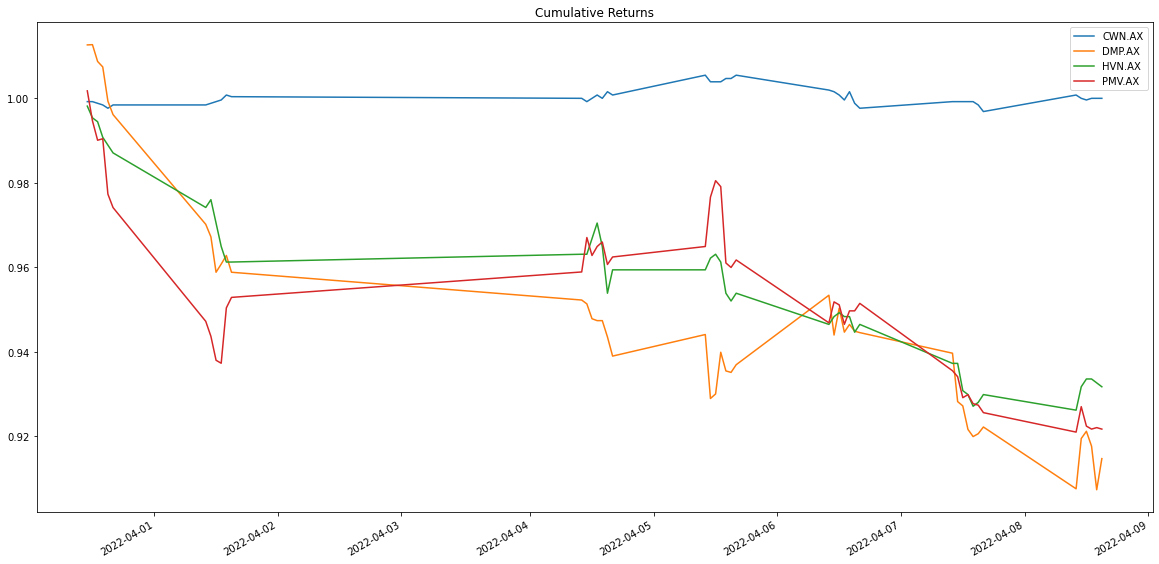

In [23]:
cumulative_returns = (1 + datareturns_df).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize=(20, 10), title="Cumulative Returns")

[{'uuid': '35db0943-c305-37f5-ac1b-ce8d7d59138d',
  'title': 'NATO plans permanent military presence at border, says Stoltenberg - The Telegraph',
  'publisher': 'Reuters',
  'link': 'https://finance.yahoo.com/news/nato-plans-permanent-military-presence-232925320.html',
  'providerPublishTime': 1649546965,
  'type': 'STORY'},
 {'uuid': '8213fef4-e53c-3d77-bfc8-eb1a5249f1bf',
  'title': 'Jostens and the Atlanta Braves Celebrate the 2021 World Series with a One-of-a-Kind Ring that Brings Their Championship Journey to Life',
  'publisher': 'GlobeNewswire',
  'link': 'https://finance.yahoo.com/news/jostens-atlanta-braves-celebrate-2021-232300259.html',
  'providerPublishTime': 1649546580,
  'type': 'STORY'},
 {'uuid': 'f668bc97-6a64-3eab-a650-46cfeda527dd',
  'title': 'Returns Are Gaining Momentum At Austal (ASX:ASB)',
  'publisher': 'Simply Wall St.',
  'link': 'https://finance.yahoo.com/news/returns-gaining-momentum-austal-asx-231846714.html',
  'providerPublishTime': 1649546326,
  'type

[{'uuid': 'edab8827-1e64-33a2-b0f8-783005e49926',
  'title': "At UK£3.83, Is Domino's Pizza Group plc (LON:DOM) Worth Looking At Closely?",
  'publisher': 'Simply Wall St.',
  'link': 'https://finance.yahoo.com/news/uk-3-83-dominos-pizza-091125777.html',
  'providerPublishTime': 1649322685,
  'type': 'STORY'},
 {'uuid': 'e7c3f159-f3f1-3cfc-9871-8678b2f73db4',
  'title': "Domino's Pizza franchise projection falls short of analyst expectations, driving downgrade",
  'publisher': 'MarketWatch',
  'link': 'https://finance.yahoo.com/m/e7c3f159-f3f1-3cfc-9871-8678b2f73db4/domino%27s-pizza-franchise.html',
  'providerPublishTime': 1649182337,
  'type': 'STORY'},
 {'uuid': '17f7b05c-fb42-3f61-88fa-a609b4c52350',
  'title': "Domino's Still Looks Like Cold Pizza",
  'publisher': 'TheStreet.com',
  'link': 'https://finance.yahoo.com/m/17f7b05c-fb42-3f61-88fa-a609b4c52350/domino%27s-still-looks-like.html',
  'providerPublishTime': 1649169420,
  'type': 'STORY'},
 {'uuid': 'de0299e1-b834-311e-8af7-

[{'uuid': '6de123b9-ab0f-3afb-a747-8d54614cabed',
  'title': 'Fixing of Coupon Rates\xa0 - Nykredit Realkredit A/S',
  'publisher': 'GlobeNewswire',
  'link': 'https://finance.yahoo.com/news/fixing-coupon-rates-nykredit-realkredit-114900032.html',
  'providerPublishTime': 1649332140,
  'type': 'STORY'},
 {'uuid': '93b87227-d7eb-38a3-b72a-2f8e3b5f48e0',
  'title': 'Alliance Trust PLC - Net Asset Value',
  'publisher': 'GlobeNewswire',
  'link': 'https://finance.yahoo.com/news/alliance-trust-plc-net-asset-114900609.html',
  'providerPublishTime': 1649332140,
  'type': 'STORY'},
 {'uuid': 'e38ab8df-573d-30c7-87dc-1ac0029e39bd',
  'title': 'GoTab Appoints Mike Dunn as Chief Financial Officer',
  'publisher': 'PR Newswire',
  'link': 'https://finance.yahoo.com/news/gotab-appoints-mike-dunn-chief-114900501.html',
  'providerPublishTime': 1649332140,
  'type': 'STORY'},
 {'uuid': 'e86c89de-c42f-3ca4-aa3d-8c14b9fd4ffc',
  'title': 'North America Pet Food Packaging Market (2022 to 2028) - Incre

[{'uuid': '6de123b9-ab0f-3afb-a747-8d54614cabed',
  'title': 'Fixing of Coupon Rates\xa0 - Nykredit Realkredit A/S',
  'publisher': 'GlobeNewswire',
  'link': 'https://finance.yahoo.com/news/fixing-coupon-rates-nykredit-realkredit-114900032.html',
  'providerPublishTime': 1649332140,
  'type': 'STORY'},
 {'uuid': '93b87227-d7eb-38a3-b72a-2f8e3b5f48e0',
  'title': 'Alliance Trust PLC - Net Asset Value',
  'publisher': 'GlobeNewswire',
  'link': 'https://finance.yahoo.com/news/alliance-trust-plc-net-asset-114900609.html',
  'providerPublishTime': 1649332140,
  'type': 'STORY'},
 {'uuid': 'e38ab8df-573d-30c7-87dc-1ac0029e39bd',
  'title': 'GoTab Appoints Mike Dunn as Chief Financial Officer',
  'publisher': 'PR Newswire',
  'link': 'https://finance.yahoo.com/news/gotab-appoints-mike-dunn-chief-114900501.html',
  'providerPublishTime': 1649332140,
  'type': 'STORY'},
 {'uuid': 'e86c89de-c42f-3ca4-aa3d-8c14b9fd4ffc',
  'title': 'North America Pet Food Packaging Market (2022 to 2028) - Incre